# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [96]:
# The URL for the API
test_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial"
test_query_url=test_url+"&q="+'Hobart'+"&appid="+weather_api_key
test_weather=requests.get(test_query_url).json()
pprint(test_weather)


{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -42.8794, 'lon': 147.3294},
 'dt': 1612669476,
 'id': 2163355,
 'main': {'feels_like': 52.92,
          'humidity': 48,
          'pressure': 1007,
          'temp': 66.72,
          'temp_max': 71.01,
          'temp_min': 64.4},
 'name': 'Hobart',
 'sys': {'country': 'AU',
         'id': 9545,
         'sunrise': 1612639248,
         'sunset': 1612690131,
         'type': 1},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 23.02}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
# Create empty list to retrieve the data
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set a counter
counter = 1 

print("Beginning Data Retrieval")
print("------------------------------")

# Create a loop statement for data retreival
for city in cities:
    
    #Using try and except for data to see if they can catch or not
    try:
        response = requests.get(url+"&q="+city+"&appid="+weather_api_key).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f'Processing Record {counter} | {city_record}')
        counter = counter + 1
        time.sleep(1.30)
        
    except:
        print("City not found. Skipping...")
    continue
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 | Hobart
Processing Record 2 | Punta Arenas
Processing Record 3 | George Town
Processing Record 4 | Puerto Ayora
Processing Record 5 | Carnarvon
Processing Record 6 | Port Alfred
Processing Record 7 | Ribeira Grande
Processing Record 8 | Bathsheba
Processing Record 9 | Torbay
Processing Record 10 | Hermanus
Processing Record 11 | Bluff
Processing Record 12 | Nikel
Processing Record 13 | Ushuaia
Processing Record 14 | Kapaa
Processing Record 15 | Gizo Government Station
Processing Record 16 | Rikitea
Processing Record 17 | Albany
Processing Record 18 | Mataura
City not found. Skipping...
Processing Record 19 | Half Moon Bay
Processing Record 20 | Luanda
Processing Record 21 | Verkhnyaya Sinyachikha
Processing Record 22 | Nouadhibou
City not found. Skipping...
Processing Record 23 | Tuktoyaktuk
Processing Record 24 | Atuona
Processing Record 25 | San Ramon
Processing Record 26 | Atar
Processing Record 27 | Kuytun

City not found. Skipping...
Processing Record 235 | Paita
Processing Record 236 | Requena
Processing Record 237 | Nouakchott
Processing Record 238 | Krasnooktyabrskiy
Processing Record 239 | Pangody
Processing Record 240 | Coyhaique
Processing Record 241 | Soligalich
Processing Record 242 | Sangar
Processing Record 243 | Chiredzi
Processing Record 244 | Yatou
Processing Record 245 | Shimanovsk
Processing Record 246 | Paamiut
City not found. Skipping...
Processing Record 247 | Karratha
Processing Record 248 | Marawi
Processing Record 249 | Saint Paul Harbor
Processing Record 250 | Crateús
Processing Record 251 | Kaitangata
Processing Record 252 | Chara
Processing Record 253 | Dhārchula
Processing Record 254 | Kuito
Processing Record 255 | Alyangula
Processing Record 256 | Sitka
Processing Record 257 | Teya
Processing Record 258 | Beringovskiy
Processing Record 259 | Tazovsky
Processing Record 260 | Mbeya
Processing Record 261 | Taksimo
Processing Record 262 | Shanghai
Processing Record 

Processing Record 461 | Dicabisagan
Processing Record 462 | Mackenzie
Processing Record 463 | Kunming
Processing Record 464 | Palāsa
Processing Record 465 | Labuhan
Processing Record 466 | Kirovskiy
Processing Record 467 | Goubellat
Processing Record 468 | Hualmay
Processing Record 469 | Seymchan
Processing Record 470 | Bubaque
Processing Record 471 | Arlit
Processing Record 472 | Mitsamiouli
Processing Record 473 | Port Keats
Processing Record 474 | Santa Cruz de la Sierra
Processing Record 475 | Fabrica
Processing Record 476 | Kandara
Processing Record 477 | Nago
Processing Record 478 | Kipushi
City not found. Skipping...
Processing Record 479 | Nabire
Processing Record 480 | Ilhabela
Processing Record 481 | Moindou
Processing Record 482 | Dombarovskiy
Processing Record 483 | Oromocto
Processing Record 484 | Forsytheganj
Processing Record 485 | Vardø
Processing Record 486 | Katsuura
Processing Record 487 | Dunedin
Processing Record 488 | Adrar
Processing Record 489 | Kieta
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date    
})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,68.00,45,75,16.11,AU,1612661779
1,Punta Arenas,-53.1500,-70.9167,51.80,66,0,17.27,CL,1612661595
2,George Town,5.4112,100.3354,80.60,83,20,2.30,MY,1612661728
3,Puerto Ayora,-0.7393,-90.3518,77.00,93,50,6.69,EC,1612661537
4,Carnarvon,-24.8667,113.6333,84.20,100,40,13.80,AU,1612661784
...,...,...,...,...,...,...,...,...,...
577,Royan,45.6285,-1.0281,42.80,87,0,8.05,FR,1612662604
578,Koslan,63.4564,48.8989,-22.88,83,65,10.87,RU,1612662605
579,Mezhdurechensk,53.6942,88.0603,21.02,95,37,3.96,RU,1612662445
580,Saryg-Sep,51.5000,95.6000,2.44,90,0,3.49,RU,1612662608


In [40]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,19.422643,22.986949,49.291804,73.601375,50.446735,8.279759,1.612662e+09
std,33.288816,90.728937,32.700640,19.172265,40.811726,5.903742,2.557174e+02
min,-54.800000,-179.166700,-42.000000,8.000000,0.000000,0.160000,1.612662e+09
25%,-8.884200,-57.279650,26.677500,65.000000,2.000000,3.917500,1.612662e+09
50%,21.316150,27.397650,61.440000,78.000000,51.000000,6.910000,1.612662e+09
75%,49.174025,103.087550,75.000000,87.000000,91.750000,11.500000,1.612662e+09
max,78.218600,179.316700,98.010000,100.000000,100.000000,31.070000,1.612663e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#Convert the weather_df to csv file
weather_df.to_csv('../output_data/weather_df.csv')


In [42]:
#Check to see if there cities with humidity over 100%
file_path = pd.read_csv('../output_data/weather_df.csv')
weather_df
check_humidity = weather_df.loc[weather_df["Humidity"] >= 100]
check_humidity
#No cities have Humidity over 100 but these cities have Humidity = 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Carnarvon,-24.8667,113.6333,84.20,100,40,13.80,AU,1612661784
53,Hambantota,6.1241,81.1185,71.60,100,20,1.14,LK,1612661854
80,Kathmandu,27.7167,85.3167,35.60,100,20,3.44,NP,1612661643
136,Mbanza-Ngungu,-5.2500,14.8667,68.22,100,100,3.36,CD,1612661947
277,Bereda,43.2686,-7.5406,35.01,100,61,3.00,ES,1612662175
359,Kitama,-10.7167,39.7333,75.20,100,20,9.22,TZ,1612662293
408,Bonavista,48.6499,-53.1147,41.00,100,89,6.91,CA,1612662363
499,Cayenne,4.9333,-52.3333,77.00,100,90,8.05,GF,1612662477
509,Kiryat Gat,31.6100,34.7642,55.00,100,0,1.70,IL,1612662468
523,Havre-St-Pierre,50.2334,-63.5986,28.40,100,90,29.93,CA,1612662527


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

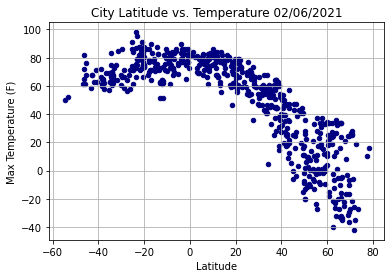

In [56]:
#Plot latitude vs Max Temperature
weather_df.plot.scatter(x = 'Lat', y = 'Max Temp', marker='o', color='navy')

#Graph details
plt.title("City Latitude vs. Temperature 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

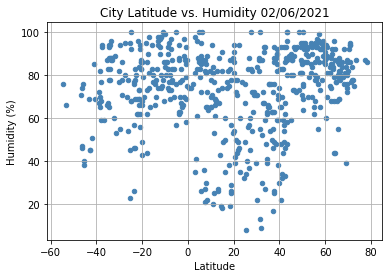

In [132]:
#Plot Latitude vs Humidity
weather_df.plot.scatter(x = 'Lat', y = 'Humidity', marker='o', color='steelblue')

#Graph Details
plt.title("City Latitude vs. Humidity 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

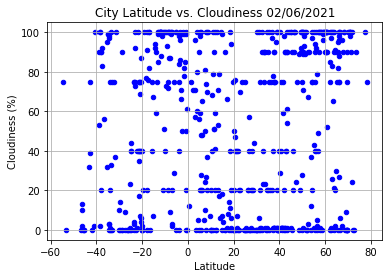

In [166]:
#Plot Latitude vs Cloudiness
weather_df.plot.scatter(x = 'Lat', y = 'Cloudiness', marker='o', color='blue')

#Graph Details
plt.title("City Latitude vs. Cloudiness 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

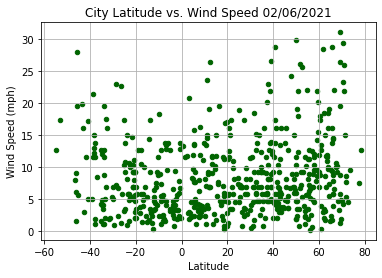

In [120]:
#Plot Latitude vs Wind Speed
weather_df.plot.scatter(x = 'Lat', y = 'Wind Speed', marker='o', color='darkgreen')

#Graph Details
plt.title("City Latitude vs. Wind Speed 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Lat_vs_Wind_Speed.png')

## Linear Regression
The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):


In [84]:
#Create two separate df for Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#and Southern Hemisphere (less than 0 degrees latitude)

north_hem_df = weather_df.loc[weather_df["Lat"] >= 0]
south_hem_df = weather_df.loc[weather_df["Lat"] < 0]

#Create empty list to store slope, intercepts, r_values, and regression for both north and south hem
north_slopes = []
north_intercepts = []
north_r_values = []
north_regresses = []

south_slopes = []
south_intercepts = []
south_r_values = []
south_regresses = []

#Now calculate the values for North by using for loop 
n_col = ('Max Temp','Humidity','Cloudiness','Wind Speed')
for i in n_col:
    #x-axis will be latitude and y-axis will be value in n_col
    x_north_values=north_hem_df['Lat']
    y_north_values=north_hem_df[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_values, y_north_values)
    north_regress = x_north_values * slope + intercept
    north_r_squared=rvalue**2
    north_slopes.append(slope)
    north_intercepts.append(intercept)
    north_r_values.append(north_r_squared)
    north_regresses.append(north_regress)
    
#Now calculate the values for South by using for loop     
s_col = ('Max Temp','Humidity','Cloudiness','Wind Speed')
for i in s_col:
    #x-axis will be latitude and y-axis will be value in n_col
    x_south_values=south_hem_df['Lat']
    y_south_values=south_hem_df[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_values, y_south_values)
    south_regress = x_south_values * slope + intercept
    south_r_squared=rvalue**2
    south_slopes.append(slope)
    south_intercepts.append(intercept)
    south_r_values.append(south_r_squared)
    south_regresses.append(south_regress)

In [92]:
#Create a new df to store slopes, intercepts, and r-squared for each hemisphere 
north_hemis_df = pd.DataFrame({
    "North Slope": north_slopes,
    "North Intercepts": north_intercepts,,
    "North R Squared": north_r_values},
    ['Max Temp','Humidity','Cloudiness','Wind Speed'])
north_hemis_df

,North Slope,North Intercepts,North R Squared
Max Temp,-1.424472,92.697331,0.753281
Humidity,0.333541,59.318461,0.107406
Cloudiness,0.493703,29.551562,0.059863
Wind Speed,0.049548,6.861861,0.027024


In [93]:
#Create a new df to store slopes, intercepts, and r-squared for each hemisphere 
south_hemis_df = pd.DataFrame({
    "South Slope": south_slopes,
    "South Intercepts": south_intercepts,
    "South R Squared": south_r_values},
    ['Max Temp','Humidity','Cloudiness','Wind Speed'])
south_hemis_df

,South Slope,South Intercepts,South R Squared
Max Temp,0.327652,80.425241,0.207218
Humidity,0.308454,82.710837,0.069784
Cloudiness,1.016914,74.915610,0.108476
Wind Speed,-0.129543,4.583967,0.102520


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7532812884111012


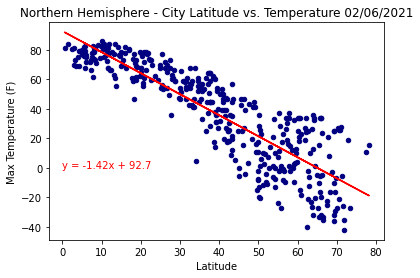

In [148]:
#Plot latitude vs Max Temperature
north_hem_df.plot.scatter(x = 'Lat', y = 'Max Temp', marker='o', color='navy')

#Graph details
plt.title("Northern Hemisphere - City Latitude vs. Temperature 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(north_slopes[0], 2)) + "x + " + str(round(north_intercepts[0], 2))
plt.annotate(line_equation, (0,0), color='red')

#Plot the line regression
plt.plot(x_north_values, north_regresses[0], 'red')

#Print out the r-value
print(f'The r-value is: {north_r_values[0]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere_Lat_vs_Temp.png')

In [102]:
#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2072181403884724


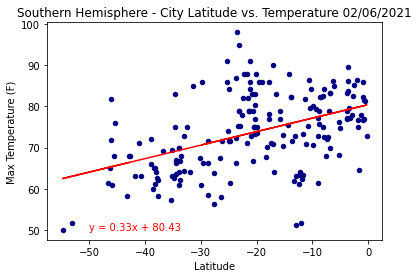

In [165]:
#Plot latitude vs Max Temperature
south_hem_df.plot.scatter(x = 'Lat', y = 'Max Temp', marker='o', color='navy')

#Graph details
plt.title("Southern Hemisphere - City Latitude vs. Temperature 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(south_slopes[0], 2)) + "x + " + str(round(south_intercepts[0], 2))
plt.annotate(line_equation, (-50,50), color='red')

#Plot the line regression
plt.plot(x_south_values, south_regresses[0], 'red')

#Print out the r-value
print(f'The r-value is: {south_r_values[0]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere_Lat_vs_Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10740597782949154


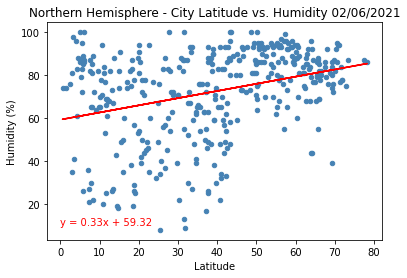

In [150]:
#Plot latitude vs Humidity
north_hem_df.plot.scatter(x = 'Lat', y = 'Humidity', marker='o', color='steelblue')

#Graph details
plt.title("Northern Hemisphere - City Latitude vs. Humidity 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(north_slopes[1], 2)) + "x + " + str(round(north_intercepts[1], 2))
plt.annotate(line_equation, (0,10), color='red')

#Plot the line regression
plt.plot(x_north_values, north_regresses[1], 'red')

#Print out the r-value
print(f'The r-value is: {north_r_values[1]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere_Lat_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06978400854881074


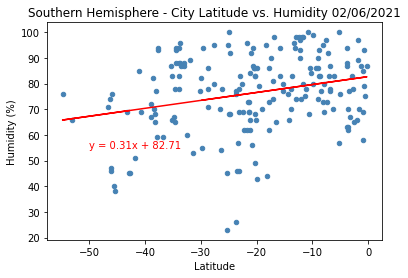

In [164]:
#Plot latitude vs Humidity
south_hem_df.plot.scatter(x = 'Lat', y = 'Humidity', marker='o', color='steelblue')

#Graph details
plt.title("Southern Hemisphere - City Latitude vs. Humidity 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(south_slopes[1], 2)) + "x + " + str(round(south_intercepts[1], 2))
plt.annotate(line_equation, (-50,55), color='red')

#Plot the line regression
plt.plot(x_south_values, south_regresses[1], 'red')

#Print out the r-value
print(f'The r-value is: {south_r_values[1]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere_Lat_vs_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05986265422857594


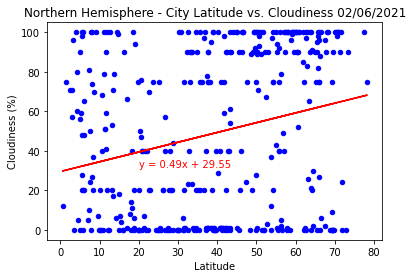

In [163]:
#Plot latitude vs Cloudiness
north_hem_df.plot.scatter(x = 'Lat', y = 'Cloudiness', marker='o', color='blue')

#Graph details
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(north_slopes[2], 2)) + "x + " + str(round(north_intercepts[2], 2))
plt.annotate(line_equation, (20,32), color='red')

#Plot the line regression
plt.plot(x_north_values, north_regresses[2], 'red')

#Print out the r-value
print(f'The r-value is: {north_r_values[2]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere_Lat_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10847649760951802


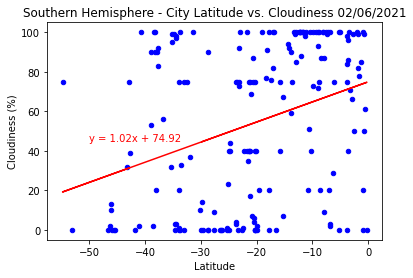

In [162]:
#Plot latitude vs Cloudiness
south_hem_df.plot.scatter(x = 'Lat', y = 'Cloudiness', marker='o', color='blue')

#Graph details
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(south_slopes[2], 2)) + "x + " + str(round(south_intercepts[2], 2))
plt.annotate(line_equation, (-50,45), color='red')

#Plot the line regression
plt.plot(x_south_values, south_regresses[2], 'red')

#Print out the r-value
print(f'The r-value is: {south_r_values[2]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere_Lat_vs_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02702413201430199


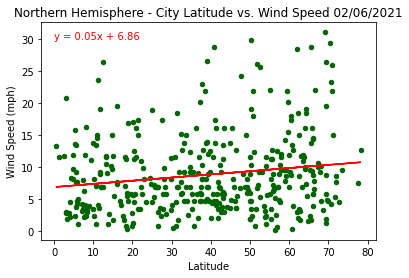

In [161]:
#Plot latitude vs Wind Speed
north_hem_df.plot.scatter(x = 'Lat', y = 'Wind Speed', marker='o', color='darkgreen')

#Graph details
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(north_slopes[3], 2)) + "x + " + str(round(north_intercepts[3], 2))
plt.annotate(line_equation, (0,30), color='red')

#Plot the line regression
plt.plot(x_north_values, north_regresses[3], 'red')

#Print out the r-value
print(f'The r-value is: {north_r_values[3]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere_Lat_vs_Wind_Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10252031688524714


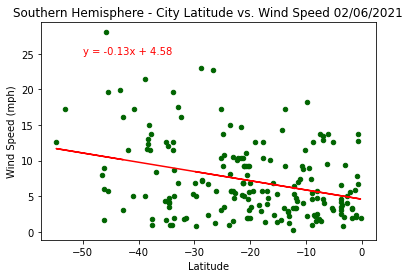

In [160]:
#Plot latitude vs Wind Speed
south_hem_df.plot.scatter(x = 'Lat', y = 'Wind Speed', marker='o', color='darkgreen')

#Graph details
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed 02/06/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Print out the line equation and put it in the map
line_equation = "y = " + str(round(south_slopes[3], 2)) + "x + " + str(round(south_intercepts[3], 2))
plt.annotate(line_equation, (-50,25), color='red')

#Plot the line regression
plt.plot(x_south_values, south_regresses[3], 'red')

#Print out the r-value
print(f'The r-value is: {south_r_values[3]}')

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere_Lat_vs_Wind_Speed.png')